In [ ]:
# 폴더에 있는 데이터를 train, validation으로 가져오는 방법
train용
'C:\\Users\\user\\MyPython\\DL\\archive\\test_set\\test_set\\dogs'
'C:\\Users\\user\\MyPython\\DL\\archive\\test_set\\test_set\\cats'

validation용
'C:\\Users\\user\\MyPython\\DL\\archive\\training_set\\training_set\\dogs'
'C:\\Users\\user\\MyPython\\DL\\archive\\training_set\\training_set\\cats'

In [36]:
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras as keras

img_w, img_h = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\user\\MyPython\\DL\\archive\\training_set\\training_set',
        target_size=(img_w, img_h),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'C:\\Users\\user\\MyPython\\DL\\archive\\test_set\\test_set',
        target_size=(img_w, img_h),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [37]:
model = keras.models.load_model('catdog_model.h5')
model.summary()

model.fit(
        train_generator,
        epochs=1,
        validation_data=validation_generator)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [38]:
# 원본 이미지 회전, 확대, 반전 등의 확장 처리를 모두 150*150 픽셀로 리사이즈 한 것을
# flow_from_directory() 메소드가 저장되어있는 하위 디렉토리에서 생성할 수도 있지만 자동으로 생성되어 진행된다.

# CNN 확률 dogs(1)이 된다. 판정할 경우 0.5를 임계값으로 가진다. 
# 0.5 미만이면 cats, 0.5 이상이면 dogs가 된다.

print(train_generator.class_indices)
print(validation_generator.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [39]:
# 모델 컴파일 수행
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [ ]:
# step 2 평가 단계(학습단계)

# model.fit(
#         train_generator,
#         epochs=1,
#         validation_data=validation_generator)

In [ ]:
# step 3 응용 단계
# 예측값 까지 확인
# 이미지 가져와서 numpy 리턴하는 이미지로 예측률을 확인해보자

In [ ]:
1. RNN 개념이해 _주가, 음성데이터, 음악, 문서, 기상
2. RNN 간단한 코드로 확인
3. RNN 모델을 이용한 검증, 예측률

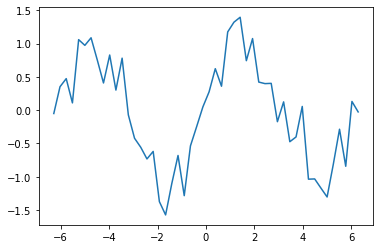

array([-6.28318531, -6.02672876, -5.77027222, -5.51381568, -5.25735913,
       -5.00090259, -4.74444605, -4.48798951, -4.23153296, -3.97507642,
       -3.71861988, -3.46216333, -3.20570679, -2.94925025, -2.6927937 ,
       -2.43633716, -2.17988062, -1.92342407, -1.66696753, -1.41051099,
       -1.15405444, -0.8975979 , -0.64114136, -0.38468481, -0.12822827,
        0.12822827,  0.38468481,  0.64114136,  0.8975979 ,  1.15405444,
        1.41051099,  1.66696753,  1.92342407,  2.17988062,  2.43633716,
        2.6927937 ,  2.94925025,  3.20570679,  3.46216333,  3.71861988,
        3.97507642,  4.23153296,  4.48798951,  4.74444605,  5.00090259,
        5.25735913,  5.51381568,  5.77027222,  6.02672876,  6.28318531])

In [40]:
# RNN 1
import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi)  # 일반 범위 값 50개의 데이터

sin_data = np.sin(x_data) + 0.3*np.random.randn(len(x_data))  # 난수로 노이즈 더한값

plt.plot(x_data, sin_data)

plt.show()  # 그래프확인 하게되면 노이즈 부분이 플롯 된 것을 확인

x_data

In [41]:
# RNN 1-2 : 입력 데이터와 정답 데이터 작성

n_rnn = 15  # 시계열 수

n_sample = len(x_data) - n_rnn  # 샘플 50 - 15 = 35
i_data = np.zeros((n_sample, n_rnn))  # 입력
c_data = np.zeros((n_sample, n_rnn))  # 정답

for i in range(0, n_sample):
    i_data[i] = sin_data[i:i+n_rnn]  # x_data(데이터수 : 50)
    c_data[i] = sin_data[i+1:i+n_rnn+1]
#     print(i_data)

In [42]:
i_data = i_data.reshape(n_sample, n_rnn, 1)   # keras 원형 RNN 입력데이터 형식
c_data = c_data.reshape(n_sample, n_rnn, 1)

print(i_data.shape)
print(c_data.shape)

(35, 15, 1)
(35, 15, 1)


In [ ]:
# RNN 1-3

SimpleRNN : 전체 계층 중 중간층으로 재귀된다.
LSTM : 복잡한 시계열 데이터 처리, 학습시간이 오래걸린다.
GRU : LSTM의 단순버전으로 매개변수가 적기때문에 학습시간이 오래걸리지 않는다.

In [43]:
# RNN 1-3 모델 만들기
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

batch_size = 5  # 배치크기
n_in = 1  # 입력층 크기
n_mid = 20  # 중간층
n_out = 1  # 출력층

In [44]:
model = Sequential()

# SimpleRNN의 activation 기본값이 tanh 설정, input_shape(15-시계열수, 1_뉴런수)
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='sgd')

model.summary()

# SimpleRNN의 Param = 440?
# 입력가중치 = 입력의 차수 * 숨어있는 차수 = 1*20
# 숨겨진 값 = 히든차수 * 히든차수 = 20*20
# 바이어스 = 히든차수 = 20

# model = Sequential()
# model.add(Embedding(4000, 32, input_shape=20)) = 4000*32 = 128000
# model.add(LSTM(64)) = 32*64*4 + 64*64*4 + 64*4 =
# model.add(SimpleRNN(64)) = 32*64*64*64 =
# model.add(GPU(64))

print()
print('============================================================')
print(len(model.layers[0].get_weights()), '\n')
i_w, h_w, bias = model.layers[0].get_weights()
print(i_w.size, h_w.size, bias.size)  # 20, 400, 20

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 15, 20)            440       
_________________________________________________________________
dense_5 (Dense)              (None, 15, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________

3 

20 400 20


In [45]:
# RNN 1-4 RNN 모델을 이용한 학습하기
history = model.fit(i_data, c_data, epochs=100, batch_size=batch_size, validation_split=0.1)

Epoch 1/100
7/7 [==============================] - 3s 124ms/step - loss: 0.2141 - val_loss: 0.1970
Epoch 2/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1693 - val_loss: 0.1880
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1501 - val_loss: 0.1834
Epoch 4/100
7/7 [==============================] - 0s 24ms/step - loss: 0.1583 - val_loss: 0.1835
Epoch 5/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1508 - val_loss: 0.1862
Epoch 6/100
7/7 [==============================] - 0s 27ms/step - loss: 0.1458 - val_loss: 0.1820
Epoch 7/100
7/7 [==============================] - 0s 22ms/step - loss: 0.1440 - val_loss: 0.1776
Epoch 8/100
7/7 [==============================] - 0s 25ms/step - loss: 0.1488 - val_loss: 0.1757
Epoch 9/100
7/7 [==============================] - 0s 26ms/step - loss: 0.1446 - val_loss: 0.1825
Epoch 10/100
7/7 [==============================] - 0s 29ms/step - loss: 0.1437 - val_loss: 0.1767
Epoch 11/100
7/7 [

7/7 [==============================] - 0s 28ms/step - loss: 0.1264 - val_loss: 0.1537
Epoch 84/100
7/7 [==============================] - 0s 29ms/step - loss: 0.1219 - val_loss: 0.1557
Epoch 85/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1235 - val_loss: 0.1531
Epoch 86/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1195 - val_loss: 0.1518
Epoch 87/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1235 - val_loss: 0.1490
Epoch 88/100
7/7 [==============================] - 0s 35ms/step - loss: 0.1186 - val_loss: 0.1531
Epoch 89/100
7/7 [==============================] - 0s 25ms/step - loss: 0.1261 - val_loss: 0.1522
Epoch 90/100
7/7 [==============================] - 0s 26ms/step - loss: 0.1198 - val_loss: 0.1501
Epoch 91/100
7/7 [==============================] - 0s 35ms/step - loss: 0.1211 - val_loss: 0.1536
Epoch 92/100
7/7 [==============================] - 0s 27ms/step - loss: 0.1229 - val_loss: 0.1552
Epoch 93/100
7/7 [=====

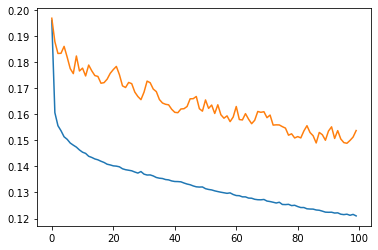

In [46]:
# RNN 1-5 손실률 시각화
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

In [47]:
# RNN 1-6 예측률은 입력된 데이터를 활용하자
# i_data = x_data(데이터 개수 : 50)
predicted = i_data[0].reshape(-1)   # 입력데이터의 첫번째 행렬을 1차원 벡터로
predicted

array([-0.0511435 ,  0.35144424,  0.47314064,  0.10873412,  1.05895462,
        0.97334059,  1.08693964,  0.75379665,  0.40819973,  0.8281219 ,
        0.30133631,  0.78087654, -0.07079602, -0.42267884, -0.55845113])

In [48]:
for i in range(0, n_sample):
    y = model.predict(predicted[-n_rnn :].reshape(1, n_rnn, 1))
    predicted = np.append(predicted, y[0][n_rnn-1][0])

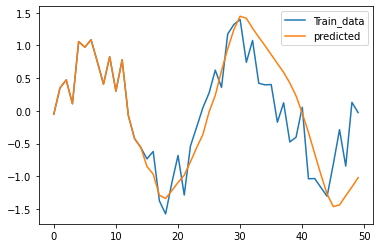

In [49]:
# 추가 데이터 예측률 시각화

plt.plot(np.arange(len(sin_data)), sin_data, label="Train_data")
plt.plot(np.arange(len(predicted)), predicted, label="predicted")
plt.legend()
plt.show()